In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_df= pd.read_csv(r"C:\Users\tahmi\OneDrive - University of Toledo\SQL_learning\BootCamp_Nov2024\house-prices-advanced-regression-techniques\train.csv")
            

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='Sale Price ($)', ylabel='Frequency'>

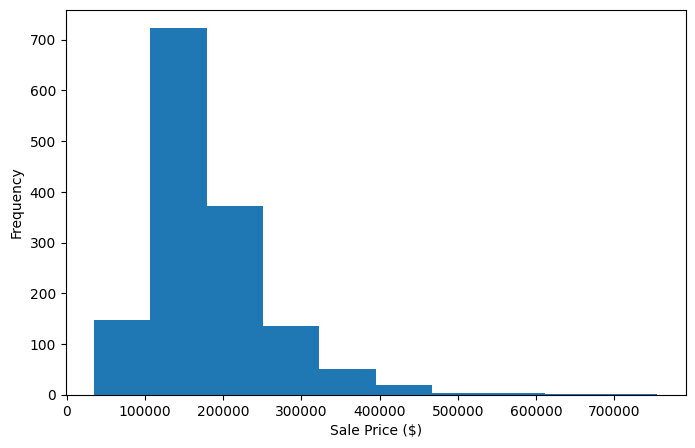

In [6]:
train_df['SalePrice'].plot.hist(figsize=(8,5), xlabel='Sale Price ($)')

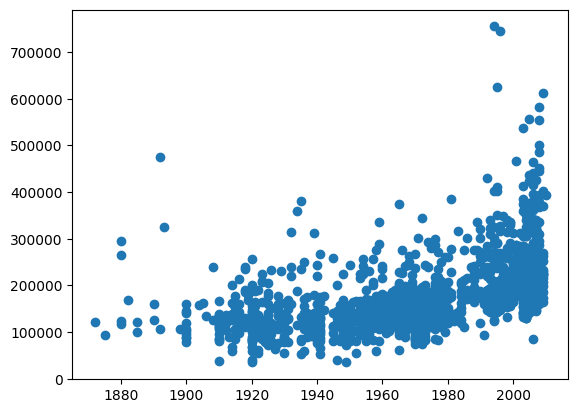

In [7]:
fig, ax= plt.subplots()
ax.scatter(train_df.YearBuilt,train_df.SalePrice )

In [8]:
train_df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [9]:
#split data
X=train_df.drop('SalePrice',axis=1)
y=train_df['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 80), (1168,), (292, 80), (292,))

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
# Identify numeric and categorical features
numeric_features = [label for label, content in X_train.items() if pd.api.types.is_numeric_dtype(content)]
categorical_features = [label for label, content in X_train.items() if not pd.api.types.is_numeric_dtype(content)]

# Create a ColumnTransformer with different transformers for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median'))
        ]), numeric_features),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ])

# Fit the transformer and transform the train and validation sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_valid_preprocessed = preprocessor.transform(X_valid)

# The transformed data is in sparse format, so convert it to a DataFrame if needed
# Get the feature names from the ColumnTransformer
columns = preprocessor.get_feature_names_out()

# Convert the transformed train data to a DataFrame
X_train_encoded = pd.DataFrame(X_train_preprocessed, columns=columns).reset_index(drop=True)

# Convert the transformed validation data to a DataFrame
X_valid_encoded = pd.DataFrame(X_valid_preprocessed, columns=columns).reset_index(drop=True)

In [14]:
X_valid_encoded.shape, X_train_encoded.shape

((292, 302), (1168, 302))

In [15]:
X_train_encoded

,num__Id,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,...,cat__SaleType_ConLw,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,639.0,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,800.0,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,381.0,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1096.0,20.0,78.0,9317.0,6.0,5.0,2006.0,2006.0,0.0,24.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1164,1131.0,50.0,65.0,7804.0,4.0,3.0,1928.0,1950.0,0.0,622.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1165,1295.0,20.0,60.0,8172.0,5.0,7.0,1955.0,1990.0,0.0,167.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1166,861.0,50.0,55.0,7642.0,7.0,8.0,1918.0,1998.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
X_train_encoded.isnull().sum().sum()

0

In [17]:
X_valid_encoded.isnull().sum().sum()

0

In [18]:
%%time


from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train_encoded, y_train)

CPU times: total: 500 ms
Wall time: 2.01 s


GradientBoostingRegressor()

In [19]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
def evaluation_metrics(model,
                      train_features= X_train_encoded,
                      train_labels=y_train,
                      valid_features=X_valid_encoded,
                      valid_labels=y_valid):
    
    # make predictions on training and validation datasets
    train_preds=model.predict(train_features)
    valid_preds=model.predict(valid_features)
    
    # create a scores dictionary
    scores={'Training RMSE': root_mean_squared_error(y_true=train_labels,
                                                    y_pred=train_preds),
           'Training MAE': mean_absolute_error(y_true=train_labels,
                                              y_pred=train_preds),
           'Training R^2': model.score(X=train_features,
                                     y=train_labels),
           'Valid RMSE': root_mean_squared_error(y_true=valid_labels,
                                                y_pred=valid_preds),
           'Valid MAE': mean_absolute_error(y_true=valid_labels,
                                          y_pred=valid_preds),
           'Valid R^2': model.score(X=valid_features,
                                   y=valid_labels)}
    return scores

In [20]:
gb_model_scores=evaluation_metrics(model=gb_model)
gb_model_scores

{'Training RMSE': 13215.044387562912,
 'Training MAE': 9822.440536285005,
 'Training R^2': 0.970720777418938,
 'Valid RMSE': 28204.679902347947,
 'Valid MAE': 17314.28878065221,
 'Valid R^2': 0.8962881177532555}

In [21]:
train_df.SalePrice.mean()

180921.19589041095

In [25]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor()
rf_model.fit(X_train_encoded, y_train)

CPU times: total: 1.86 s
Wall time: 5.61 s


RandomForestRegressor()

In [26]:
rf_model_scores=evaluation_metrics(model=rf_model)
rf_model_scores

{'Training RMSE': 11333.573559887609,
 'Training MAE': 6552.5229195205475,
 'Training R^2': 0.9784644471990652,
 'Valid RMSE': 29645.94734747697,
 'Valid MAE': 17831.558698630135,
 'Valid R^2': 0.8854178857079298}

In [87]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid= {'n_estimators' : np.arange(10,200,10),
         'max_depth': [None, 10,20],
         'min_samples_split': np.arange(2,10,1),
         'min_samples_leaf': np.arange(1,10,1),
         'max_features':[0.5, 1, 'sqrt']
         }
rs_model_rf= RandomizedSearchCV(estimator=RandomForestRegressor(),
                               param_distributions=rf_grid,
                               n_iter=20,
                               cv=3,
                               verbose=0,
                               n_jobs=-1)
rs_model_rf.fit(X_train_encoded,
              y_train)

CPU times: total: 922 ms
Wall time: 8.17 s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [89]:
rs_model_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}

In [88]:
rs_model_rf_scores=evaluation_metrics(model=rs_model_rf)
rs_model_rf_scores

{'Training RMSE': 12648.337180992588,
 'Training MAE': 8201.14795340632,
 'Training R^2': 0.9731781235369102,
 'Valid RMSE': 29081.189023288032,
 'Valid MAE': 17322.950214480006,
 'Valid R^2': 0.8897419050814593}

In [90]:
%%time

gb_grid={'n_estimators': np.arange(10, 200, 10),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [None, 10, 20],
        'min_samples_split': np.arange(2,10,1),
        'min_samples_leaf': np.arange(1,10,1),
        'subsample':[0.6,0.8,1.0],
        'max_features': [0.5,1,'sqrt'] }

rs_model_gb=RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                              param_distributions=gb_grid,
                              n_iter=20,
                              cv=3,
                              verbose=0,
                              n_jobs=-1)
rs_model_gb.fit(X_train_encoded,
               y_train)

CPU times: total: 172 ms
Wall time: 12.1 s


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [None, 10, 20],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'subsample': [0.6, 0.8, 1.0]})

In [64]:
best_params_rs_model_gb=rs_model_gb.best_params_
best_params_rs_model_gb

{'subsample': 0.6,
 'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 20,
 'learning_rate': 0.1}

In [91]:
rs_model_gb_scores=evaluation_metrics(model=rs_model_gb)
rs_model_gb_scores

{'Training RMSE': 5105.098723617931,
 'Training MAE': 3605.96926486263,
 'Training R^2': 0.9956305117203339,
 'Valid RMSE': 30935.68570043434,
 'Valid MAE': 17549.749763110358,
 'Valid R^2': 0.8752312973522131}

In [92]:
# add names of models
gb_model_scores['model_name']='Gradient Boosting'
rf_model_scores['model_name']='Random Forest'
rs_model_rf_scores['model_name']='Tuned Random Forest'
rs_model_gb_scores['model_name']='Tuned Gradient Boosting'

#Turn all model score dictionaries into a list
all_model_score=[gb_model_scores,
                 rf_model_scores,
                 rs_model_gb_scores,
                 rs_model_rf_scores]
# create DataFrame
model_comprison_df=pd.DataFrame(all_model_score).sort_values(by='Valid RMSE', ascending=False)
model_comprison_df

,Training RMSE,Training MAE,Training R^2,Valid RMSE,Valid MAE,Valid R^2,model_name
2,5105.098724,3605.969265,0.995631,30935.685700,17549.749763,0.875231,Tuned Gradient Boosting
1,11333.573560,6552.522920,0.978464,29645.947347,17831.558699,0.885418,Random Forest
3,12648.337181,8201.147953,0.973178,29081.189023,17322.950214,0.889742,Tuned Random Forest
0,13215.044388,9822.440536,0.970721,28204.679902,17314.288781,0.896288,Gradient Boosting


In [93]:
# mean RMSE score of all models
means_rmse=model_comprison_df['Valid RMSE'].mean()
means_rmse

29466.87549338682

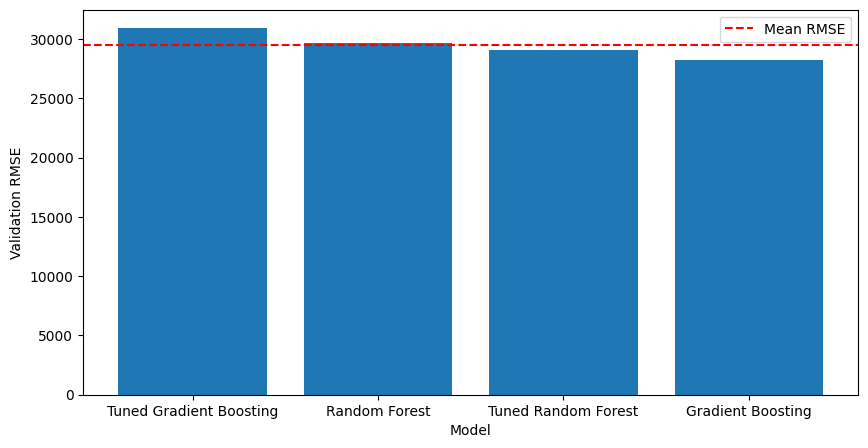

In [94]:
# plot valid rmse vs each other

plt.figure(figsize=(10,5))
plt.bar(x=model_comprison_df['model_name'],
       height=model_comprison_df['Valid RMSE'].values)
plt.xlabel('Model')
plt.ylabel('Validation RMSE')
plt.axhline(y=means_rmse,
           color='red',
           linestyle='--',
           label='Mean RMSE')
plt.legend()

In [95]:
import joblib

housing_price_best_model='GB_regressor_best_rmse.pkl'

# Save model to file
joblib.dump(value=gb_model,
           filename=housing_price_best_model)

['GB_regressor_best_rmse.pkl']

In [96]:
#load the best model
import joblib
best_model=joblib.load(filename=housing_price_best_model)
best_model

GradientBoostingRegressor()

In [71]:
best_model_scores=evaluation_metrics(model=best_model)
best_model_scores

{'Training RMSE': 8777.176591339452,
 'Training MAE': 4153.909407912696,
 'Training R^2': 0.9870838832752853,
 'Valid RMSE': 28037.301851433032,
 'Valid MAE': 16477.18333972541,
 'Valid R^2': 0.8975154023603585}

In [72]:
test_df=pd.read_csv(r"C:\Users\tahmi\OneDrive - University of Toledo\SQL_learning\BootCamp_Nov2024\house-prices-advanced-regression-techniques\test.csv")

In [73]:
# test data doesnt have SalePrice feature, so, I will predict it by the model
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [74]:
# transform the test sets based on preprocessor
test_preprocessed = preprocessor.transform(test_df)
# Convert the transformed validation data to a DataFrame
test_encoded = pd.DataFrame(test_preprocessed, columns=columns).reset_index(drop=True)

In [75]:
test_encoded.shape

(1459, 302)

In [76]:
test_encoded

,num__Id,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,...,cat__SaleType_ConLw,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
# gb_model (or it can be replaced to best_model because I already used joblib to save and load it) refers to the Gradient Boosting model, which is the best model based on comparison
test_preds=best_model.predict(test_encoded) 

In [78]:
test_preds

array([123366.6319675 , 155730.15323947, 180545.6573497 , ...,
       179034.62597929, 123112.55740231, 209802.17710755])

In [79]:
test_preds.shape, test_encoded.shape

((1459,), (1459, 302))

In [80]:
# Create a df
pred_df=pd.DataFrame()
pred_df['Id']=test_encoded['num__Id']
pred_df['SalePrcie']=test_preds
pred_df

,Id,SalePrcie
0,1461.0,123366.631968
1,1462.0,155730.153239
2,1463.0,180545.657350
3,1464.0,200435.386256
4,1465.0,208689.833248
...,...,...
1454,2915.0,94766.842370
1455,2916.0,83205.247850
1456,2917.0,179034.625979
1457,2918.0,123112.557402


In [82]:
best_model_feature_importance=gb_model.feature_importances_
best_model_feature_importance[:10]

array([4.76828841e-04, 7.72050456e-04, 1.95656802e-03, 1.83742820e-02,
       5.01624493e-01, 6.38550979e-03, 1.75188328e-02, 1.05679022e-02,
       4.12342570e-04, 3.56380260e-02])

In [83]:
best_model_feature_importance.shape, X_train_encoded.shape

((302,), (1168, 302))

In [84]:
column_names=test_encoded.columns
column_names_df=[col.replace('num__','').replace('cat__','') for col in column_names]
feature_importance_df=pd.DataFrame({'feature_names': column_names_df,
                                   'feature_importance': best_model_feature_importance}).sort_values(by='feature_importance',
                                                                                                    ascending=False)

feature_importance_df.head()

,feature_names,feature_importance
4,OverallQual,0.501624
16,GrLivArea,0.151753
26,GarageCars,0.042024
12,TotalBsmtSF,0.035946
9,BsmtFinSF1,0.035638


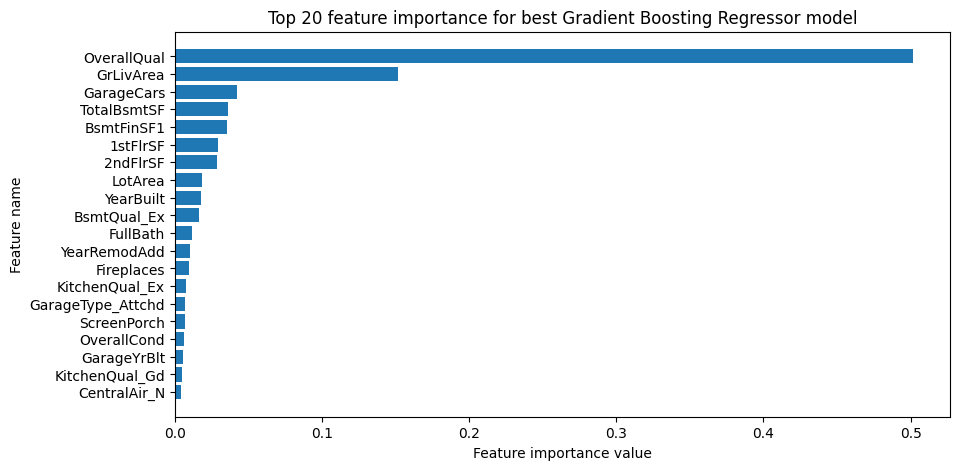

In [85]:
#plot tope feature importance
top_n=20
plt.figure(figsize=(10,5))
plt.barh(y=feature_importance_df.feature_names[:top_n],
        width=feature_importance_df.feature_importance[:top_n])
plt.xlabel('Feature importance value')
plt.ylabel('Feature name')
plt.title(f'Top {top_n} feature importance for best Gradient Boosting Regressor model')
plt.gca().invert_yaxis()
          